<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/16_Linear_algebra/16_5_Norms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 16: Elements of linear algebra

# C.5 Vector and Matrix Norms

In this Section we discuss popular vector and matrix norms that will arise frequently in our study of machine learning, particularly when discussing regularization. A norm is a kind of function that measures the length of real vectors and matrices. The notion of length is extremely useful as it enables us to define distance - or similarity - between any two vectors (or matrices) living in the same space.  

In [ ]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone images
    if not Path('chapter_16_images').is_dir():
        !ghclone https://github.com/mlr2dev/machine_learning_refined_q1_2023_dev/tree/j_branch/notes/16_Linear_algebra/chapter_16_images
    else:
        print('chapter_16_images already cloned!')

# video paths
image_path_1 = 'chapter_16_images/L2_distance.png'
image_path_2 = "chapter_16_images/L1_distance.png"
image_path_3 = "chapter_16_images/L_inf_distance.png"
image_path_4 = "chapter_16_images/triangle_inequality.png"
image_path_5 = "chapter_16_images/norm_balls.png"

from IPython.display import Image, HTML

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Vector norms

### The $\ell_{2}$ norm 

We begin with the most widely-used vector norm in machine learning, the $\ell_{2}$ norm, defined for an $N$ dimensional vector $\mathbf{x}$ as

\begin{equation}
\left\Vert \mathbf{x}\right\Vert _{2}=\sqrt{\sum_{n=1}^{N} x_{n}^{2}}
\end{equation}

Using the $\ell_{2}$ norm we can measure the distance between any two points $\mathbf{x}$ and $\mathbf{y}$ via $\left\Vert \mathbf{x}-\mathbf{y}\right\Vert _{2}$, which is simply the length of the vector connecting $\mathbf{x}$
and $\mathbf{y}$.

For example, the distance between $\mathbf{x}=\left[\begin{array}{c}
1\\
2
\end{array}\right]$ and $\mathbf{y}=\left[\begin{array}{c}
9\\
8
\end{array}\right]$ is calculated as $\sqrt{\left(1-9\right)^{2}+\left(2-8\right)^{2}}=10$, as shown pictorially in the figure below (recall Pythagorean theorem). 

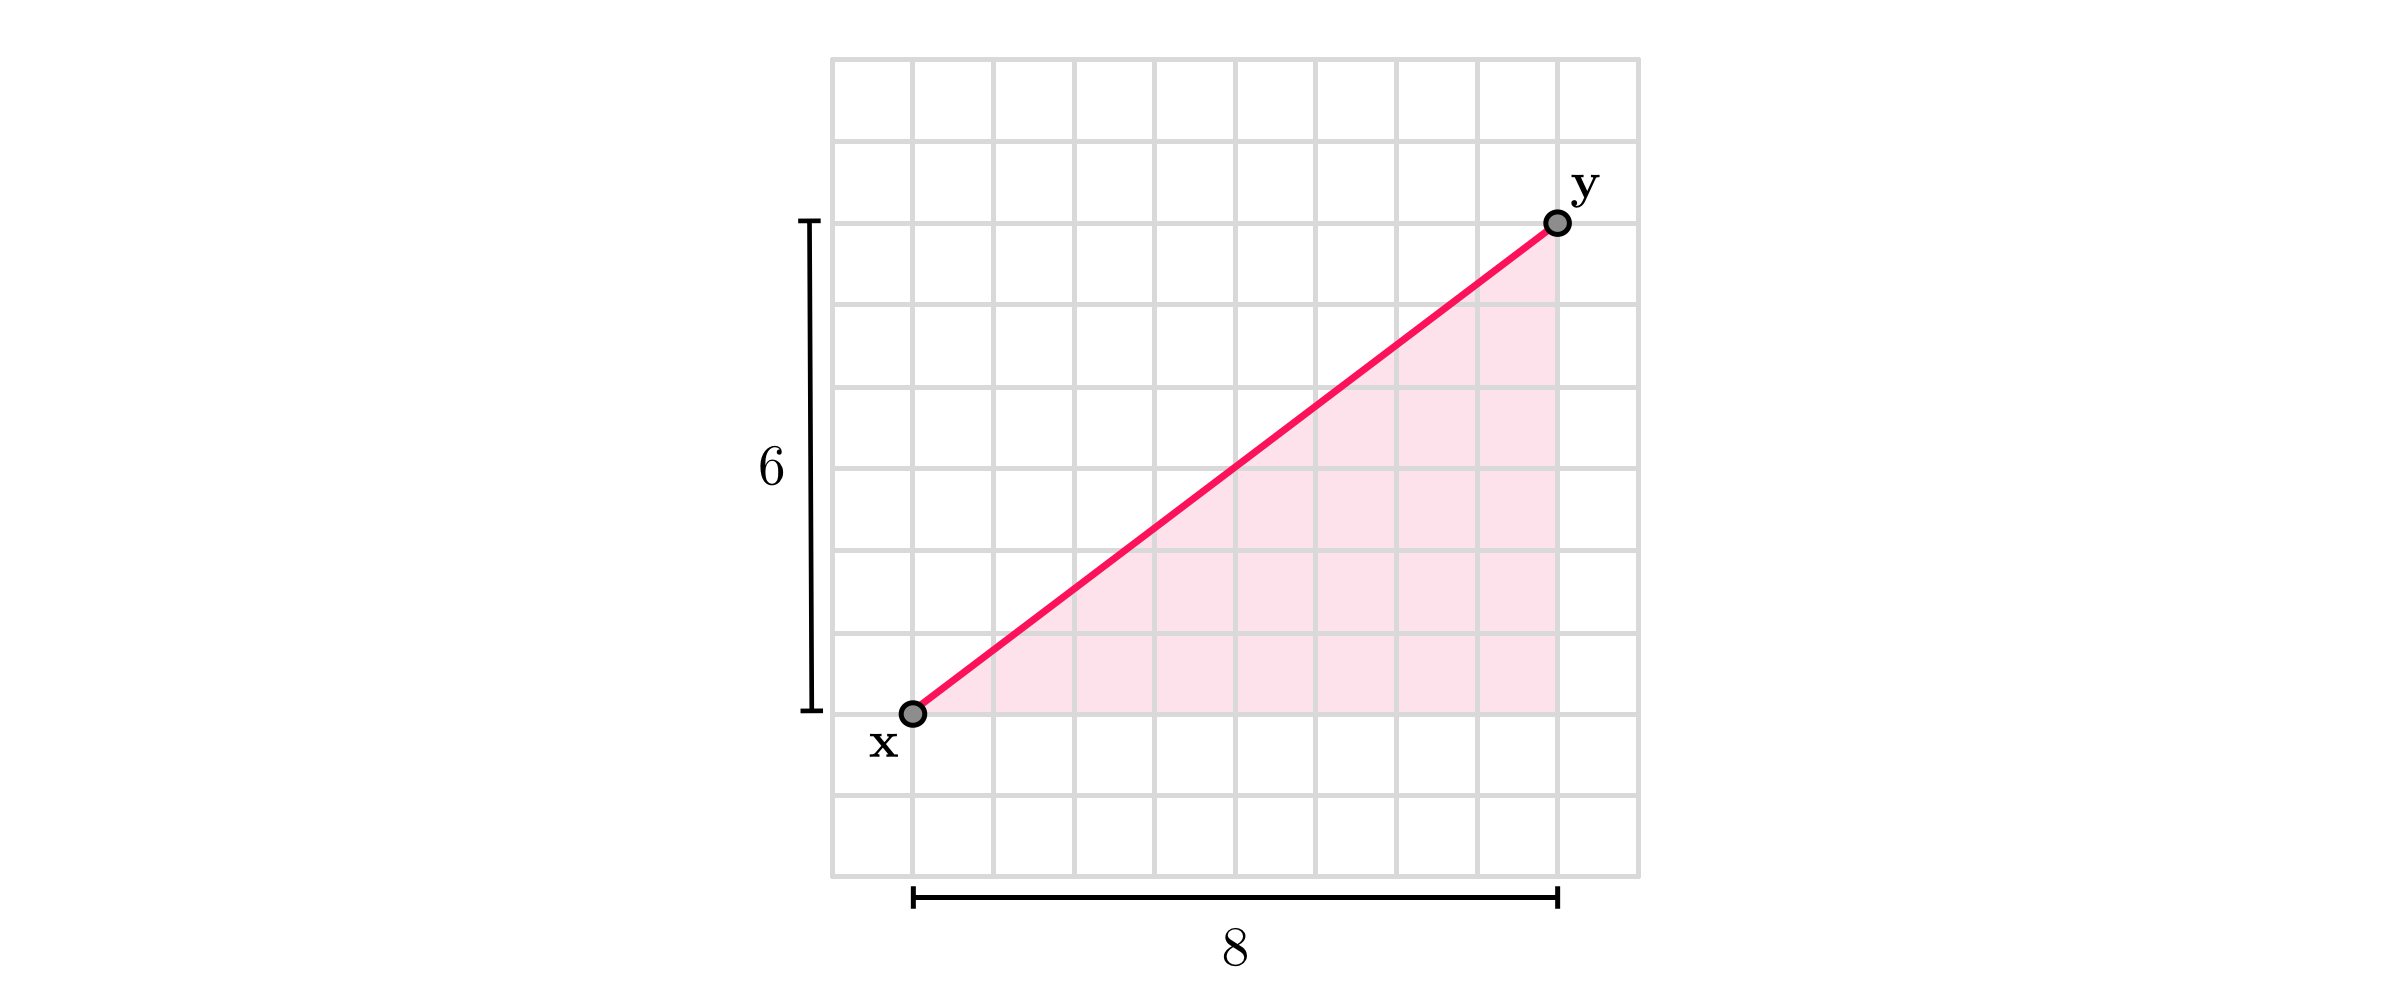

In [ ]:
Image(image_path_1)


The $\ell_{2}$ norm is not the only way to measure, or more precisely *define*, the length of a vector. There are other norms arising occasionally in machine learning that we discuss now.

### The $\ell_{1}$ norm 

The $\ell_{1}$ norm of a vector $\mathbf{x}$ is defined as the sum of the absolute values of its entries

\begin{equation}
\Vert\mathbf{x}\Vert_{1}=\sum_{n=1}^{N}\left|x_{n}\right|
\end{equation}

In terms of the $\ell_{1}$ norm the distance between $\mathbf{x}$ and $\mathbf{y}$ is given by $\left\Vert \mathbf{x}-\mathbf{y}\right\Vert _{1}$, which provides a measurement of distance different from the $\ell_{2}$ norm. As illustrated in the figure below the distance defined by the $\ell_{1}$ norm is the length of a path consisting of perpendicular pieces (shown in blue). Because these paths are somewhat akin to how an automobile might travel from $\mathbf{x}$ to $\mathbf{y}$ if they were two locations in a gridded city, having to traverse perpendicular city blocks one after the other, the $\ell_{1}$ norm is sometimes referred to as the taxicab norm, and the distance measured via the $\ell_{1}$ norm, the Manhattan distance. 

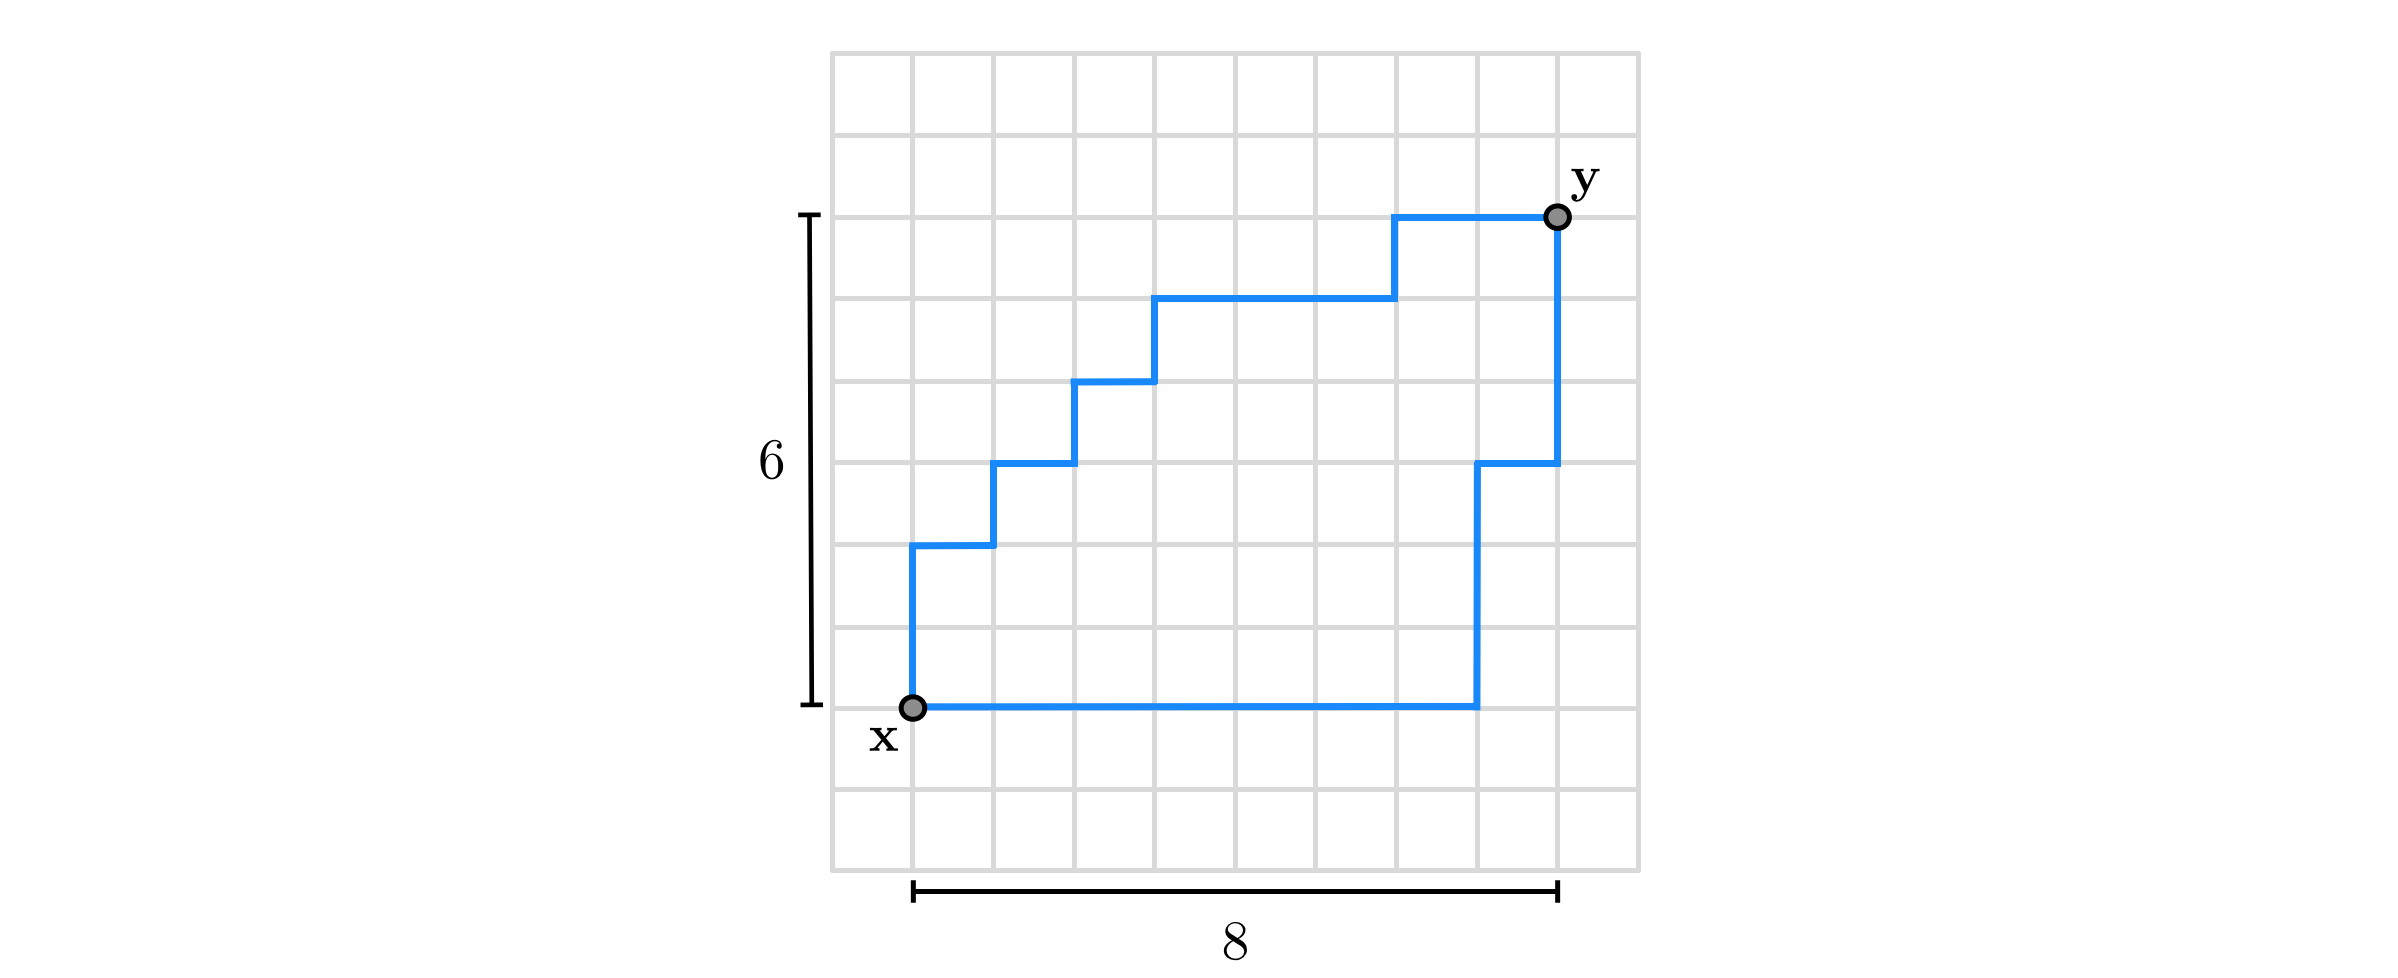

In [ ]:
Image(image_path_2)

In the example above the distance between $\mathbf{x}=\left[\begin{array}{c}
1\\
2
\end{array}\right]$ and $\mathbf{y}=\left[\begin{array}{c}
9\\
8
\end{array}\right]$ using the $\ell_{1}$ norm is calculated as $\left|1-9\right|+\left|2-8\right|=14$. 

### The $\ell_{\infty}$ norm 

The $\ell_{\infty}$ norm of a vector $\mathbf{x}$ is equal to its largest entry in terms of absolute value, defined mathematically as 

\begin{equation}
\Vert\mathbf{x}\Vert_{\infty}=\underset{n}{\text{max}}\left|x_{n}\right|
\end{equation}

For example, the distance between $\mathbf{x}=\left[\begin{array}{c}
1\\
2
\end{array}\right]$ and $\mathbf{y}=\left[\begin{array}{c}
9\\
8
\end{array}\right]$ in terms of the $\ell_{\infty}$ norm is found as $\text{max}\left(\left| 1-9\right|,\left|2-8\right|\right)=8$. 

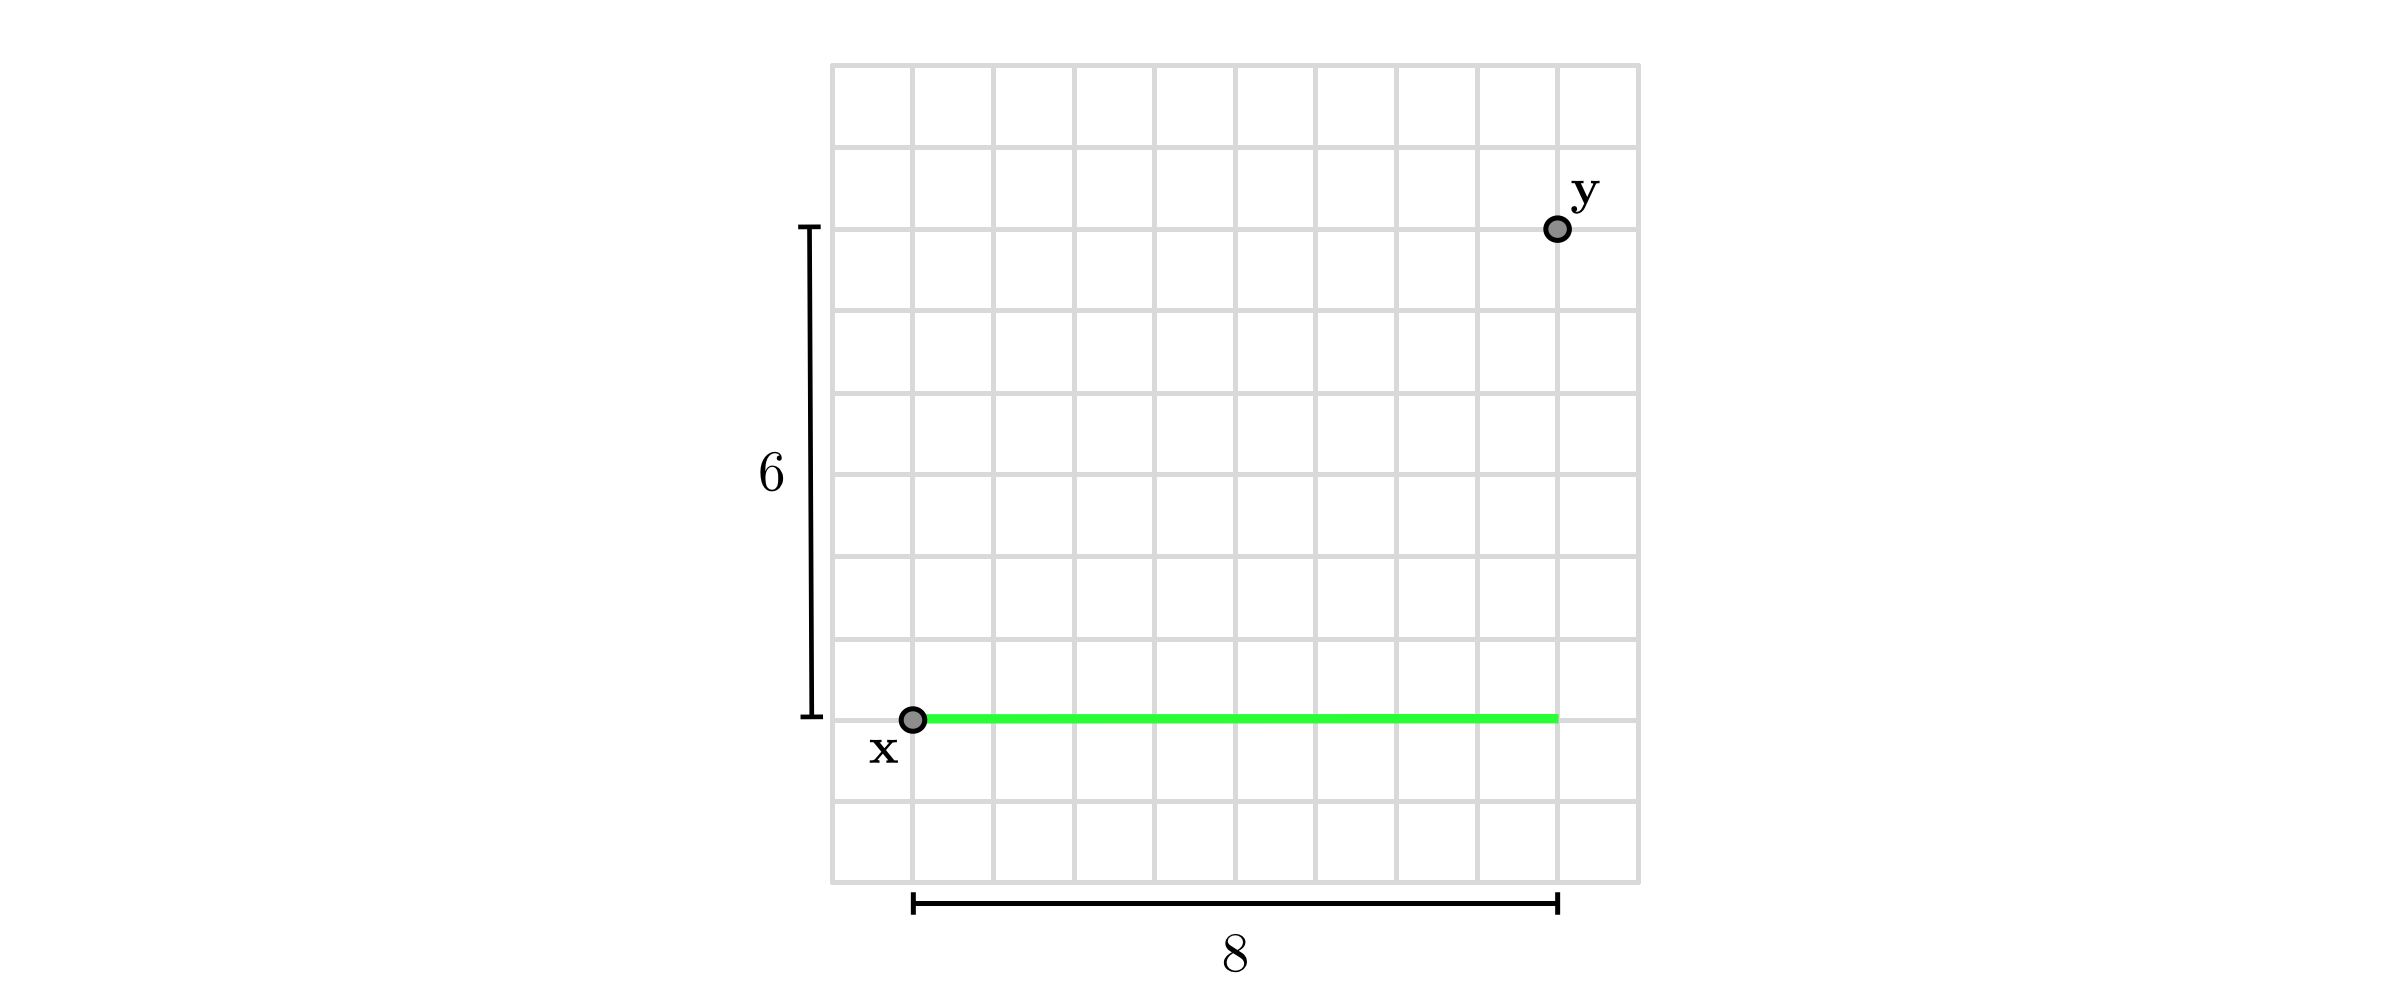

In [ ]:
Image(image_path_3)

### The $\ell_{0}$ norm 


The $\ell_0$ vector norm, written as $\left \Vert \mathbf{x} \right \Vert_0$, measures 'magnitude' as

\begin{equation}
\left \Vert \mathbf{x} \right \Vert_0 = \text{number of non-zero entries of  } \mathbf{x}.
\end{equation}

### What do these vector norms have in common?

The $\ell_{2}$, $\ell_{1}$, and $\ell_{\infty}$ norms, by virtue of being vector norms, share a number of useful properties that we detail below. Since these properties hold in general for *any* norm, we momentarily drop the subscript and represent the norm of $\mathbf{x}$ simply by $\Vert\mathbf{x}\Vert$.



1. Norms are always non-negative, that is $\Vert\mathbf{x}\Vert\geq 0$. Furthermore, the equality holds only when $\mathbf{x}=\mathbf{0}$. Therefore the norm of any nonzero vector is always greater than zero.
<br><br>
2. The norm of $\alpha\mathbf{x}$, that is a scalar multiple of $\mathbf{x}$, can be written in terms of the norm of $\mathbf{x}$, as $\Vert\alpha\mathbf{x}\Vert=\left|\alpha\right|\Vert\mathbf{x}\Vert$. With $\alpha=-1$ for example, we have that $\Vert-\mathbf{x}\Vert=\Vert\mathbf{x}\Vert$. 
<br><br>
3. Norms also satisfy the so-called *triangle inequality* where for any vectors $\mathbf{x}$, $\mathbf{y}$, and $\mathbf{z}$ we have $\Vert\mathbf{x}-\mathbf{z}\Vert+\Vert\mathbf{z}-\mathbf{y}\Vert\geq\Vert\mathbf{x}-\mathbf{y}\Vert$. As illustrated in the figure below for the $\ell_{2}$ norm (left), the $\ell_{1}$ norm (middle), and the $\ell_{\infty}$ norm (right) the triangle inequality simply states that the distance between $\mathbf{x}$ and $\mathbf{y}$ is always smaller than (or equal to) the distance between $\mathbf{x}$ and $\mathbf{z}$, and the distance between $\mathbf{z}$ and $\mathbf{y}$, combined. In other words, if one wanted to travel from a given point $\mathbf{x}$ to a given point $\mathbf{y}$, it would be always better to travel directly from $\mathbf{x}$ to $\mathbf{y}$, than to travel
first to a third point z, and then to y. With the change of variables $\mathbf{u}=\mathbf{x}-\mathbf{z}$ and $\mathbf{v}=\mathbf{z}-\mathbf{y}$, the triangle inequality is sometimes written in the simpler form of
$\Vert\mathbf{u}\Vert+\Vert\mathbf{v}\Vert\geq\Vert\mathbf{u}+\mathbf{v}\Vert$ for all vectors $\mathbf{u}$ and $\mathbf{v}$.

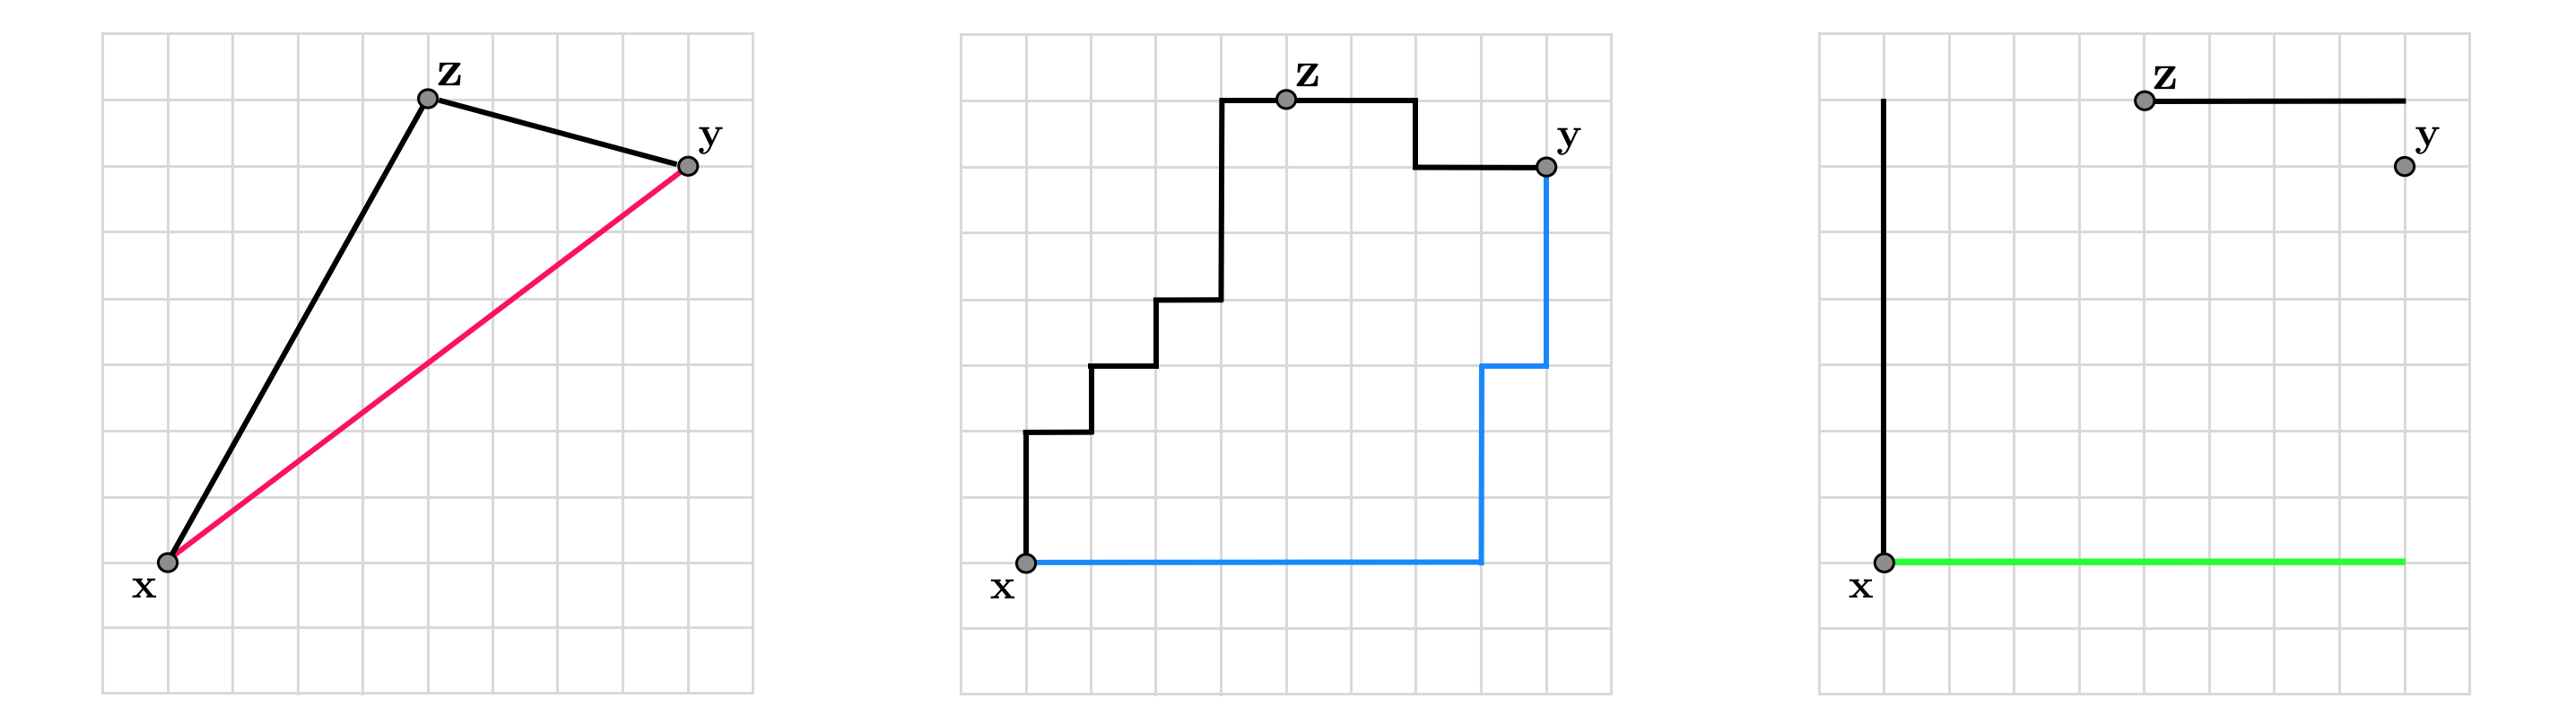

In [ ]:
Image(image_path_4)

In addition to the general properties mentioned above and held by any norm, the $\ell_{2}$, $\ell_{1}$, and $\ell_{\infty}$ norms share a stronger bond that ties them together: they are all members of the $\ell_{p}$ norm family. The $\ell_{p}$ norm is generally defined as 

\begin{equation}
\left\Vert \mathbf{x}\right\Vert _{p}=\left(\sum_{n=1}^{N}\left|x_{n}\right|^{p}\right)^{\frac{1}{p}}
\end{equation}

for $p\geq1$. One can easily verify that with $p=1$, $p=2$, and as $p\longrightarrow\infty$, the $\ell_{p}$ norm reduces to the $\ell_{1}$, $\ell_{2}$, and $\ell_{\infty}$ norm respectively. 

### The $\ell_{p}$ norm balls

A norm ball is a set of all vectors $\mathbf{x}$ with same norm value, that is, all $\mathbf{x}$such that $\left\Vert \mathbf{x}\right\Vert =c$ for some constant $c>0$. When $c=1$, this set is called the unit norm ball, or simply the unit ball. 

As you can see in the figure below, the $\ell_{1}$ unit ball takes the form of a diamond (in blue), whose equation is given by

\begin{equation}
\left|x_{1}\right|+\left|x_{2}\right|=1
\end{equation}

The $\ell_{2}$ unit ball is a circle (in red) defined by 

\begin{equation}
x_{1}^{2}+x_{2}^{2}=1
\end{equation}

And finally as $p\longrightarrow\infty$ the unit ball approaches a square (in green) characterized
by

\begin{equation}
\text{max}\left(\left|x_{1}\right|,\left|x_{2}\right|\right)=1
\end{equation}

<br>

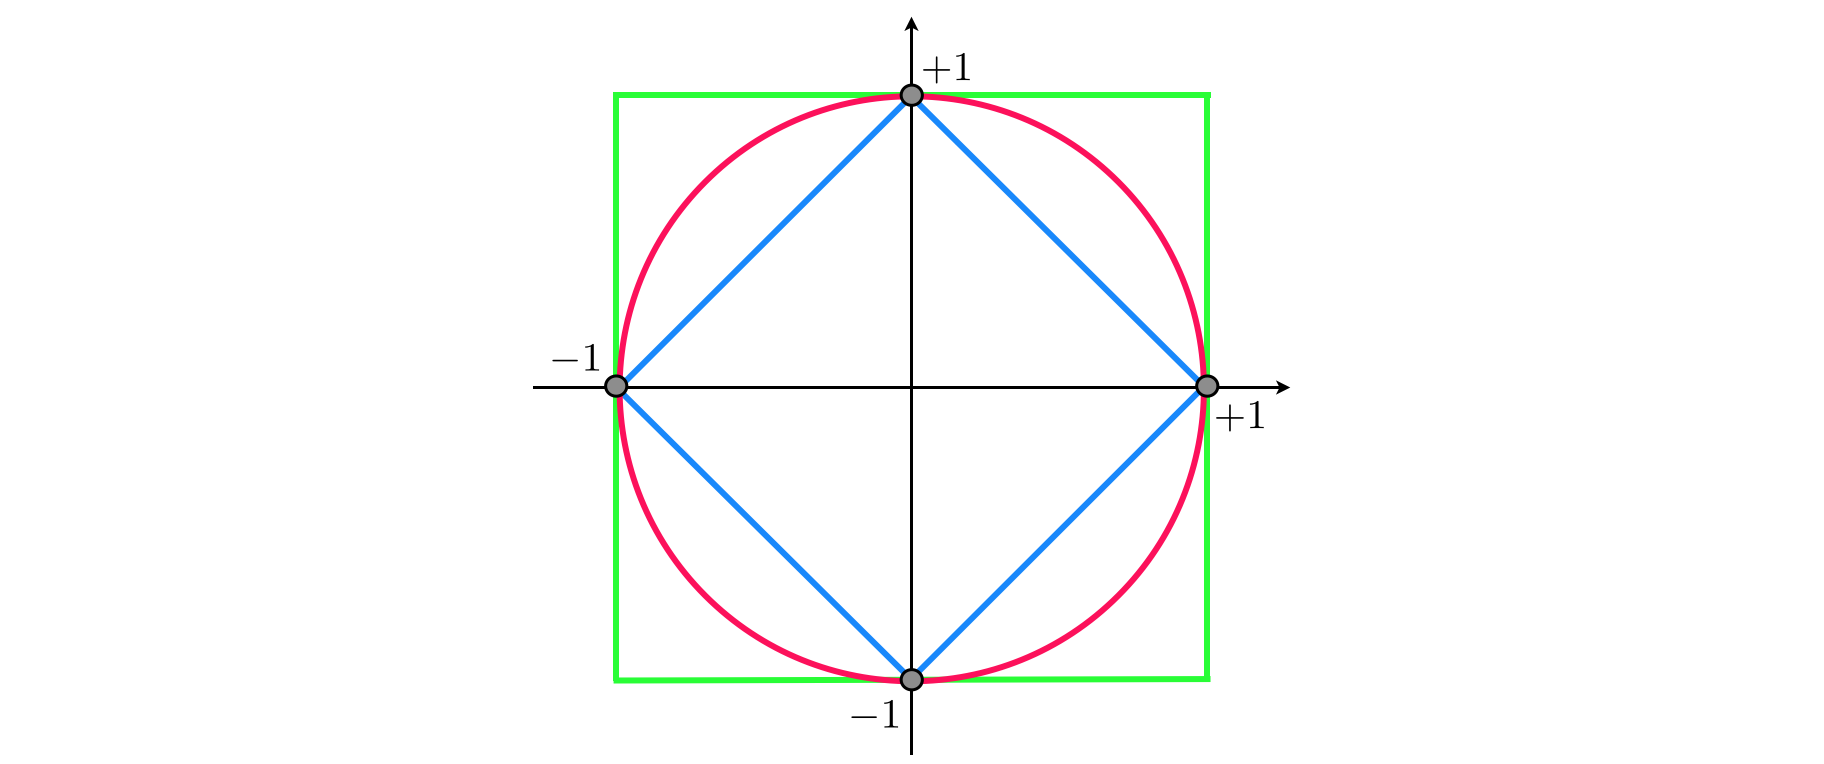

In [ ]:
Image(image_path_5)

## Matrix norms

###  The Frobenius norm

Recall that the $\ell_{2}$ norm of a vector is defined as the square root of the sum of the squares of its elements. The Frobenius norm is the intuitive extension of the $\ell_{2}$ norm for vectors to matrices, defined similarly as the square root of the sum of the squares of all the elements in the matrix. Thus, the Frobenius norm of an $N\times M$ dimensional matrix $\mathbf{X}$ is calculated as

\begin{equation}
\left\Vert \mathbf{X}\right\Vert _{F}=\sqrt{\sum_{n=1}^{N}\sum_{m=1}^{M} x_{n,m}^{2}}
\end{equation}

For example, the Frobenius norm of the matrix $\mathbf{X}=\left[\begin{array}{cc}
-1 & 2\\
0 & 5
\end{array}\right]$ can be found as $\sqrt{\left(-1\right)^{2}+2^{2}+0^{2}+5^{2}}=\sqrt{30}$.

The connection between the $\ell_{2}$ norm and the Frobenius norm goes even deeper: collecting all singular values of $\mathbf{X}$ in the vector $\mathbf{s}$ (assuming $N\leq M$)

\begin{equation}
\mathbf{s}=\left[\begin{array}{c}
\sigma_{1}\\
\sigma_{2}\\
\vdots\\
\sigma_{N}
\end{array}\right]
\end{equation}

The Frobenius norm of $\mathbf{X}$ can be shown to be equal to the $\ell_{2}$ norm of $\mathbf{s}$, i.e.,

\begin{equation}
\left\Vert \mathbf{X}\right\Vert _{F}=\left\Vert \mathbf{s}\right\Vert _{2}
\end{equation}

### The spectral and nuclear norms


The observation that the $\ell_{2}$ norm of the vector of singular values of a matrix is identical to its Frobenius norm motivates the use of other $\ell_{p}$ norms on the vector $\mathbf{s}$. In particular the $\ell_{1}$ norm of $\mathbf{s}$ defines the nuclear norm of $\mathbf{X}$ denoted by $\left\Vert \mathbf{X}\right\Vert _{*}$ 

\begin{equation}
\left\Vert \mathbf{X}\right\Vert _{*}=\left\Vert \mathbf{s}\right\Vert _{1}
\end{equation}

and the $\ell_{\infty}$ norm of $\mathbf{s}$ defines the spectral norm of $\mathbf{X}$, denoted by $\left\Vert \mathbf{X}\right\Vert _{2}$

\begin{equation}
\left\Vert \mathbf{X}\right\Vert _{2}=\left\Vert \mathbf{s}\right\Vert _{\infty}
\end{equation}

Because the singular values of real matrices are always non-negative, the spectral norm and the nuclear norm are simply the largest and the sum of the singular values respectively.